# Redes Neurais e Aprendizado Profundo
SCC0270 - 2/2022


## Trabalho 1 - Redes Densas e Convolucionais

NOME: Anderson Araujo de Oliveira

NUSP: 11371311

NOME: Vinicius Finke

NUSP: 9791052

Neste trabalho você deverá implementar duas redes neurais usando Pytorch, uma utilizando camadas densas e outra utilizando camadas convolucionais. Será utilizado o dataset Fashion MNIST.

### Instruções:

- Preencha o nome e o número USP da dupla na célula acima;
- Renomeie o notebook, inserindo o número USP de cada um da dupla, conforme o exemplo: "SCC0270-T1-1234567-7654321";
- Neste notebook, você irá encontrar 5 exercícios, cada um deles valendo uma certa quantidade de pontos. A conclusão de todos os exercícios com sucesso valerá nota 10;
- Responda cada exercício inserindo o código adequado para cada função.
- Envie o notebook inteiro como entrega do exercício.
- Certifique-se de que os códigos executam corretamente, uma vez que a nota só será atribuída caso seja possível executar o código, e ele esteja correto.
- Fraudes ou plágio implica em nota zero e possíveis medidas administrativas.


### Objetivos:

- Compreender como o aprendizado de máquina consegue resolver problemas que métodos tradicionais de programação não conseguem
- Aprender sobre o dataset público Fashion MNIST
- Observar as diferenças do uso de camadas densas e convolucionais

### Imports

In [ ]:
from torchvision import datasets, transforms, utils

import torch
import torch.nn as nn
import torch.optim as optim
import torch.nn.functional as F
from torch.autograd import Variable

import matplotlib.pyplot as plt
import numpy as np

In [ ]:
# Selecionar GPU caso disponível
device = torch.device("cuda:0" if torch.cuda.is_available() else "cpu")
device

device(type='cuda', index=0)

### Dataset Fashion-MNIST

### Dados, Anotações e Subsets

- `train_set`: Imagens usadas para treinar a rede neural. Contém anotações corretas para cada imagem de `train_set`, usado para avaliar as predições do modelo durante a fase de treinamento.
- `test_set`: Imagens usadas para avaliar o desempenho do modelo, uma vez que ele já foi treinado. Contém anotações corretas para cada imagem de `test_set`, usado para avaliar as predições do modelo durante a fase de validação


### Importar dados para a memória

In [ ]:
# Fazer o download dos dados

train_set = datasets.FashionMNIST(
    "./data",
    download=True,
    transform=transforms.Compose([transforms.ToTensor()])
)
train_loader = torch.utils.data.DataLoader(train_set, batch_size=100)

test_set = datasets.FashionMNIST(
    "./data",
    download=True,
    train=False,
    transform=transforms.Compose([transforms.ToTensor()])
)
test_loader = torch.utils.data.DataLoader(test_set, batch_size=100)

### Explorando o dataset

In [ ]:
# Tamanho do dataset
len(train_set)

60000

In [ ]:
# Vamos observar o que é cada loader
example = next(iter(train_loader))
example[0].size()

torch.Size([100, 1, 28, 28])

9


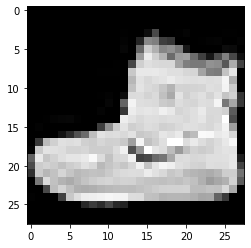

In [ ]:
# Uma imagem do train_set, com sua respectiva label
img, label = next(iter(train_set))
plt.imshow(img.squeeze(), cmap="gray")
print(label)

In [ ]:
# Função de ajuda para ler o que significa cada label
def convert_label(label):
    output_mapping = {
        0: "T-shirt/Top",
        1: "Trouser",
        2: "Pullover",
        3: "Dress",
        4: "Coat",
        5: "Sandal",
        6: "Shirt",
        7: "Sneaker",
        8: "Bag",
        9: "Ankle Boot"
    }

    if type(label) == torch.Tensor:
        input = label.item()
    else:
        input = label

    return output_mapping[input]

<class 'torch.Tensor'> <class 'torch.Tensor'>
torch.Size([10, 1, 28, 28]) torch.Size([10])
labels:  Ankle Boot, T-shirt/Top, T-shirt/Top, Dress, T-shirt/Top, Pullover, Sneaker, Pullover, Sandal, Sandal, 

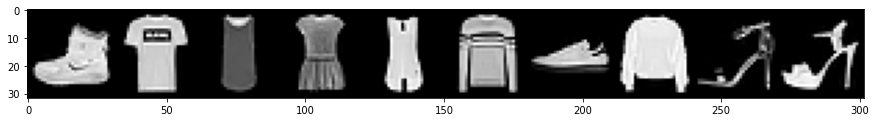

In [ ]:
# Vamos observar algumas imagens do Fashion MNIST

demo_loader = torch.utils.data.DataLoader(train_set, batch_size=10)

batch = next(iter(demo_loader))
images, labels = batch
print(type(images), type(labels))
print(images.shape, labels.shape)

grid = utils.make_grid(images, nrow=10)

plt.figure(figsize=(15, 20))
plt.imshow(np.transpose(grid, (1, 2, 0)))
print("labels: ", end=" ")
for i, label in enumerate(labels):
    print(convert_label(label), end=", ")

### Exercício 1 (3 pontos)

**Exercício**: Neste trabalho, será necessário implementar duas arquiteturas distintas de redes neurais. Uma vez que elas estejam implementadas, será necessário executar o laço (loop) de treinamento dos modelos por diversas épocas. Para isso, nesse primeiro exercício, crie uma função genérica, capaz de receber um modelo Pytorch e executar os passos básicos de propagação, cálculo do erro, retropropagação e atualização dos pesos. Essa função será utilizada nos exercícios seguintes para treinar os modelos por você implementados. Implemente o laço de treinamento de um modelo por num_epochs.

**Instruções**:
- Implemente os passos de propagação (forward)
- Realize o cálculo do erro usando um critério genérico fornecido pela assinatura da função
- Inicialize os gradientes a zero
- Implemente o passo de retropropagação do erro (backpropagation)
- Faça um passo de otimização
- DICA: como essas linhas estão englobadas em uma função, utilize os argumentos da função fit(...), de forma genérica


In [ ]:
def fit(model, criterion, optimizer, train_loader, test_loader, num_epochs=5):
    model.to(device)

    train_losses = []
    test_losses = []


    accuracy_list = []


    predictions_list = []
    labels_list = []

    for epoch in range(num_epochs):
        running_loss = 0

        for images, labels in train_loader:
            # Transfering images and labels to GPU if available
            images, labels = images.to(device), labels.to(device)

            ### INÍCIO DO CÓDIGO ### (≈ 5 linhas)

            outputs = model(images)

            optimizer.zero_grad()

            loss = criterion(outputs, labels)

            loss.backward()

            optimizer.step()

            ### FIM DO CÓDIGO ###

            running_loss += loss.item()

        else:
        # Testing the model

            with torch.no_grad():
                # Set the model to evaluation mode
                model.eval()

                total = 0
                test_loss = 0
                correct = 0

                for images, labels in test_loader:
                    images, labels = images.to(device), labels.to(device)
                    labels_list.append(labels)
                    total += len(labels)

                    ### INÍCIO DO CÓDIGO ### (≈ 1 linha)
                    outputs = model(images)

                    ### FIM DO CÓDIGO ###

                    predictions = torch.max(outputs, 1)[1].to(device)
                    predictions_list.append(predictions)
                    correct += (predictions == labels).sum()

                    test_loss += criterion(outputs, labels).item()

                test_losses.append(test_loss/len(test_loader))

                accuracy = correct * 100 / total
                accuracy_list.append(accuracy.item())


            # Set the model to training mode
            model.train()

        train_losses.append(running_loss/len(train_loader))

        print(f'Epoch {epoch+1}/{num_epochs} .. Train Loss: {train_losses[-1]:.5f} .. Test Loss: {test_losses[-1]:.5f} .. Test Accuracy: {accuracy_list[-1]:.3f}%')


    results = {
        'train_losses': train_losses,
        'test_losses': test_losses,
        'accuracy_list': accuracy_list
    }

    return results

### Exercício 2 - Camadas Densas (2 pontos)

**Exercício 2.A**: Implemente uma rede neural, usando camadas densas (fully connected), capaz de classificar as imagens do dataset Fashion MNIST. Descreva e justifique a escolha dos parâmetros e das camadas.

**Instruções**:
- Inicialize a superclasse
- Crie o projeto da rede neural usando camadas densas
- Implemente o passo de propagação
- Insira uma célula de texto, ou comentários ao longo do código com a justificativa

In [ ]:
class NetworkDense(nn.Module):

    def __init__(self):

        super(NetworkDense,self).__init__()
        self.fc1 = nn.Linear(28*28, 200)
        self.fc2 = nn.Linear(200, 100)
        self.fc3 = nn.Linear(100, 10)
    def forward(self, x):
        x = x.view(-1, 28*28)
        x = F.relu(self.fc1(x))
        x = F.relu(self.fc2(x))
        x = F.log_softmax(self.fc3(x))

        return x


In [ ]:
# Justifique a escolha da arquitetura

#Utilizamos três linear
#Onde a primeira camada contem 28*28 o tamanho da imagem
#Para as camadas seguintes diminuímos gradativamente a quantidade neurônios porem de forma que
#Poderia ter o máximo de combinações entre os neurônios até chegarmos ao tamanho da classe 10 e assim usar log_softmax

**Exercício 2.B**: Utilizando a classe `NetworkDense` implementada anteriormente, inicialize o modelo, defina uma função para loss, o otimizador, e a learning rate desejados. Depois, treine o modelo por algumas épocas.

In [ ]:
### INÍCIO DO CÓDIGO ### (≈ 4 linhas)
model_dense = NetworkDense()
criterion = nn.CrossEntropyLoss()
learning_rate =  0.01
optimizer = optim.Adam(model_dense.parameters(), lr=learning_rate,weight_decay=0.01)
### FIM DO CÓDIGO ###

print(model_dense)

NetworkDense(
  (fc1): Linear(in_features=784, out_features=200, bias=True)
  (fc2): Linear(in_features=200, out_features=100, bias=True)
  (fc3): Linear(in_features=100, out_features=10, bias=True)
)


In [ ]:
### INÍCIO DO CÓDIGO ### (≈ 1 linha)
den_results = fit(model_dense, criterion, optimizer, train_loader, test_loader,10)
### FIM DO CÓDIGO ###

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:13: UserWarning: Implicit dimension choice for log_softmax has been deprecated. Change the call to include dim=X as an argument.
  del sys.path[0]


Epoch 1/10 .. Train Loss: 0.66884 .. Test Loss: 0.57671 .. Test Accuracy: 79.990%
Epoch 2/10 .. Train Loss: 0.58068 .. Test Loss: 0.56733 .. Test Accuracy: 79.950%
Epoch 3/10 .. Train Loss: 0.56693 .. Test Loss: 0.55051 .. Test Accuracy: 81.330%
Epoch 4/10 .. Train Loss: 0.55705 .. Test Loss: 0.54346 .. Test Accuracy: 81.220%
Epoch 5/10 .. Train Loss: 0.55188 .. Test Loss: 0.55476 .. Test Accuracy: 81.230%
Epoch 6/10 .. Train Loss: 0.55483 .. Test Loss: 0.55502 .. Test Accuracy: 80.790%
Epoch 7/10 .. Train Loss: 0.55545 .. Test Loss: 0.55178 .. Test Accuracy: 79.580%
Epoch 8/10 .. Train Loss: 0.55168 .. Test Loss: 0.56972 .. Test Accuracy: 80.060%
Epoch 9/10 .. Train Loss: 0.55213 .. Test Loss: 0.55808 .. Test Accuracy: 80.990%
Epoch 10/10 .. Train Loss: 0.55001 .. Test Loss: 0.60414 .. Test Accuracy: 78.620%


### Exercício 3  - Camadas Convolucionais (2 pontos)

**Exercício 3.A**: Implemente uma rede neural, usando camadas convolucionais (Conv2d), capaz de classificar as imagens do dataset Fashion MNIST. Descreva e justifique a escolha dos parâmetros e das camadas.

**Instruções**:
- Inicialize a superclasse
- Crie o projeto da rede neural usando camadas convolucionais
- Implemente o passo de propagação
- Insira uma célula de texto, ou comentários ao longo do código com a justificativa

In [ ]:
from numpy.ma.core import size
class NetworkCNN(nn.Module):

    def __init__(self):
        super(NetworkCNN, self).__init__()

        self.conv1 = nn.Conv2d(in_channels=1, out_channels=20, kernel_size=(5, 5)) #520 parametros
        self.relu1 = nn.ReLU()
        self.maxpool1 = nn.MaxPool2d(kernel_size=(2, 2), stride=(2, 2))

        self.conv2 = nn.Conv2d(in_channels=20, out_channels=50, kernel_size=(5, 5)) #25050 parametros
        self.relu2 = nn.ReLU()
        self.maxpool2 = nn.MaxPool2d(kernel_size=(2, 2), stride=(2, 2))

        self.fc1 = nn.Linear(in_features=800, out_features=500) #400500
        self.relu3 = nn.ReLU()

        self.fc2 = nn.Linear(in_features=500, out_features=10) #5010 parametros
        self.logSoftmax = nn.LogSoftmax(dim=1)


    def forward(self, x):

        x = self.conv1(x)
        x = self.relu1(x)
        x = self.maxpool1(x)

        x = self.conv2(x)
        x = self.relu2(x)
        x = self.maxpool2(x)

        x = torch.flatten(x, 1)
        x = self.fc1(x)
        x = self.relu3(x)

        x = self.fc2(x)
        output = self.logSoftmax(x)

        return output


In [ ]:
# Justifique a escolha da arquitetura

#Duas camadas convulocionais com um max pool seguido fazemos um flatten na matriz
#Para utilizar um sistema de rede densa (nn.linear), por causa que a rede convulocional filtro os parametros de forma que os mais relevantes ficassem
#Para nn.linear redes densas, assim escolhe isso para que possa aplicar logsoftmax

**Exercício 3.B**: Utilizando a classe `NetworkCNN` implementada anteriormente, inicialize o modelo, defina uma função para loss, o otimizador, e a learning rate desejados. Depois, treine o modelo por algumas épocas.

In [ ]:
### INÍCIO DO CÓDIGO ### (≈ 4 linhas)

model_cnn = NetworkCNN()
criterion =  nn.CrossEntropyLoss()
learning_rate = 0.001
optimizer = optim.Adam(model_cnn.parameters(), learning_rate, weight_decay=0.0001)
### FIM DO CÓDIGO ###

print(model_cnn)

NetworkCNN(
  (conv1): Conv2d(1, 20, kernel_size=(5, 5), stride=(1, 1))
  (relu1): ReLU()
  (maxpool1): MaxPool2d(kernel_size=(2, 2), stride=(2, 2), padding=0, dilation=1, ceil_mode=False)
  (conv2): Conv2d(20, 50, kernel_size=(5, 5), stride=(1, 1))
  (relu2): ReLU()
  (maxpool2): MaxPool2d(kernel_size=(2, 2), stride=(2, 2), padding=0, dilation=1, ceil_mode=False)
  (fc1): Linear(in_features=800, out_features=500, bias=True)
  (relu3): ReLU()
  (fc2): Linear(in_features=500, out_features=10, bias=True)
  (logSoftmax): LogSoftmax(dim=1)
)


In [ ]:
### INÍCIO DO CÓDIGO ### (≈ 1 linha)
cnn_results = fit(model_cnn, criterion, optimizer, train_loader, test_loader,10)
### FIM DO CÓDIGO ###

Epoch 1/10 .. Train Loss: 0.55258 .. Test Loss: 0.42896 .. Test Accuracy: 84.170%
Epoch 2/10 .. Train Loss: 0.34042 .. Test Loss: 0.36880 .. Test Accuracy: 86.230%
Epoch 3/10 .. Train Loss: 0.28979 .. Test Loss: 0.32649 .. Test Accuracy: 87.780%
Epoch 4/10 .. Train Loss: 0.25772 .. Test Loss: 0.29576 .. Test Accuracy: 89.260%
Epoch 5/10 .. Train Loss: 0.23390 .. Test Loss: 0.28352 .. Test Accuracy: 89.690%
Epoch 6/10 .. Train Loss: 0.21484 .. Test Loss: 0.28373 .. Test Accuracy: 89.850%
Epoch 7/10 .. Train Loss: 0.19642 .. Test Loss: 0.28446 .. Test Accuracy: 89.870%
Epoch 8/10 .. Train Loss: 0.18089 .. Test Loss: 0.28653 .. Test Accuracy: 89.980%
Epoch 9/10 .. Train Loss: 0.16619 .. Test Loss: 0.29034 .. Test Accuracy: 90.450%
Epoch 10/10 .. Train Loss: 0.15149 .. Test Loss: 0.28617 .. Test Accuracy: 90.700%


### Exercício 4  - Quantidade de parâmetros treináveis (1 ponto)

**Exercício**: Quantos parâmetros treináveis cada um dos modelos desenvolvidos possui? Justifique. Informe os valores para `model_dense` e `model_cnn`.

model_dense = 178.110

model_cnn = 431.080

cálculo de camadas densas: (28\*28\*200+200+200\*100+100+100\*10+10)

cálculo de camadas convolucionais: (5\*5\*1+1)\*20+(5\*5\*20+1)\*50+800\*500+500+500\*10+10)

### Exercício 5 - Comparação de Resultados (2 pontos)

**Exercício**: Compare as métricas de acurácia dos dois modelos desenvolvidos. Qual dos dois obteve melhores resultados?  Por quê? Qual característica das redes que justificam seu desempenho?

Utilize o gráfico para auxiliar na análise. Insira uma célula de texto com a sua resposta

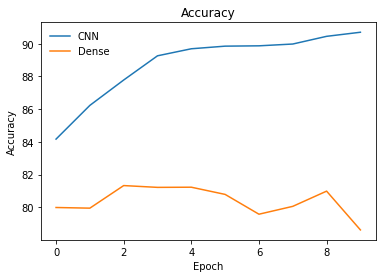

In [ ]:
### INÍCIO DO CÓDIGO ### (≈ 2 linhas)
plt.plot(cnn_results['accuracy_list'],label='CNN')
plt.plot(den_results['accuracy_list'],label='Dense')
### FIM DO CÓDIGO ###

plt.legend(frameon=False)
plt.xlabel("Epoch")
plt.ylabel("Accuracy")
plt.title("Accuracy")
plt.show()

Podemos ver que a rede CNN obteve melhores resultados, isso se deve principalmente à imensa quantidade de parâmetros de treinamento (aproximadamente 4x mais do que na rede densa) e ao uso das operações de convolução dentro das matrizes, possibilitando um cálculo mais eficiente dos tensores e ao uso conjunto dessas operações com camadas densas, para finalizar a predição do algoritmo.

### Indo além... - Comparação de Resultados (sem ponto)

É possível plotar o gráfico de loss do treino e da validação para cada um dos modelos. Observe como os erros se comportam de maneira diferente para cada um dos subsets.

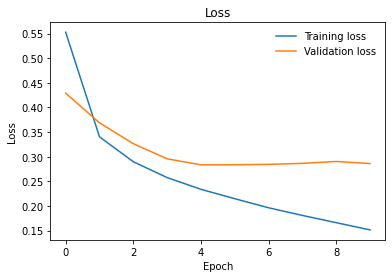

In [ ]:
plt.plot(cnn_results['train_losses'], label='Training loss')
plt.plot(cnn_results['test_losses'], label='Validation loss')

plt.legend(frameon=False)
plt.xlabel("Epoch")
plt.ylabel("Loss")
plt.title("Loss")
plt.show()

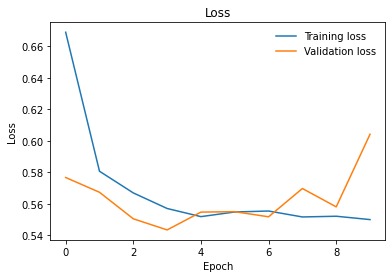

In [ ]:
plt.plot(den_results['train_losses'], label='Training loss')
plt.plot(den_results['test_losses'], label='Validation loss')

plt.legend(frameon=False)
plt.xlabel("Epoch")
plt.ylabel("Loss")
plt.title("Loss")
plt.show()